Term Project Assignment:

A PowerPoint presentation outlining your statistical question/hypothesis
    
    X A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).
    
    X Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
    
    X Describe what the 5 variables mean in the dataset (Chapter 1).
    
    X Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
    
    X Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
    
    X Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

    X Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

    X Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

    X Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

    X Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

    X For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

Your code or screenshots of your code
    
    - A 250-500-word paper summarizing the following: Statistical/Hypothetical Question
    
    - Outcome of your EDA
    
    - What do you feel was missed during the analysis?
    
    - Were there any variables you felt could have helped in the analysis?
    
    - Were there any assumptions made you felt were incorrect?
    
    - What challenges did you face, what did you not fully understand?
    
    - Submit a link to your repository to the assignment link during the final week of class.

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import warnings
import math
import matplotlib as plt
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

def Summarize(df, column, title):
    """Print summary statistics male, female and all."""

    items = [
        ('All Yrs', df[column]),
        ('2021', df[(df.Wave == 1) | (df.Wave == 2)][column]),
        ('2022', df[(df.Wave == 3) | (df.Wave == 4)][column]),
        ('2023', df[(df.Wave == 5) | (df.Wave == 6)][column]),
        ('2024', df[(df.Wave == 7) | (df.Wave == 8)][column]),
        ]

    print(title)
    print('key\tn\tmean\tmode\tvar\tstd\tcv')
    for key, series in items:
        mean, var, mode = series.mean(), series.var(), series.mode()
        std = math.sqrt(var)
        cv = std / mean
        t = key, len(series), mean, mode, var, std, cv
        print('%s\t%d\t%4.2f\t%4.2f\t%4.2f\t%4.2f\t%4.4f' % t)

# Collect and Format Data

datain = []
datain.append(pd.read_csv("TermProjectFull.s24mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s23mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s22mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s21mri.csv.zip"))
first = pd.concat(datain)
labels = first.columns[7:]
dataindex = pd.DataFrame()
dataindex["Label"] = labels
columns = []
for i in range(1,126):
    columns.append("X" + str(i))
dataindex["Code"] = columns
dataindex = dataindex.set_index("Code")

data = pd.DataFrame()
data["RespID"] = first.RespID
columns = ["RespID","Health","HHI","Love","Faith","Happy","Politics"]
for i in range(1,126):
    columns.append("X" + str(i))
first.columns = columns
rest = ""
for i in range(2,126):
    rest += (" + X" + str(i))

first["HHIOctile"] = 0
octile = np.quantile(first["HHI"],[x/8 for x in range(1,8)])
first.HHIOctile[first["HHI"] < octile[0]] = 1
for x in range(0,6):
    first.HHIOctile[(first["HHI"] >= octile[x]) & (first["HHI"] < octile[x+1])] = x+2
first.HHIOctile[first["HHI"] >= octile[6]] = 8

# Use regression analysis to find the questions that are most correlated with the top-line measures of health, wealth, love, and faith.
# The top-line measures were taken from other parts of the MRI-Simmons survey so that they would not appear in this regression.

formula = "Health ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Health:\n", final.nlargest(5,"Coef"))
data["Health"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[0:5]:
    data["Health"] += first[cur]

formula = "HHIOctile ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Wealth:\n", final.nlargest(5,"Coef"))
data["Wealth"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[0:5]:
    data["Wealth"] += first[cur]

formula = "Love ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Love:\n", final.nlargest(5,"Coef"))
data["Love"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[0:5]:
    data["Love"] += first[cur]

formula = "Faith ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Faith:\n", final.nlargest(5,"Coef"))
data["Faith"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[0:5]:
    data["Faith"] += first[cur]


Health:
           Coef                                              Label
X101  0.080299        I make sure I take time for myself each day
X80   0.074765  Keeping a neat, organized home is a top priori...
X42   0.066211     I have a better fashion sense than most people
X82   0.053597  I feel I am more environmentally conscious tha...
X103  0.052898  I often choose methods of transportation that ...
Wealth:
           Coef                                              Label
X113  0.363950  I consider my work to be a career, not just a job
X44   0.207292                 I am more capable than most people
X1    0.165013             I enjoy entertaining people in my home
X19   0.149750  My friends and acquaintances look to me to org...
X72   0.140639       I often find myself in a leadership position
Love:
           Coef                                              Label
X99   0.202690  I frequently wish I had more time to spend wit...
X84   0.091593     I often indulge my children with

In [2]:
data["Wave"] = [int(x)-81 for x in first["RespID"].str[:2]]
data["Happy"] = first["Happy"]
data["Strength"] = data.Health + data.Wealth + data.Love + data.Faith

# Note: Political Outloook in the study is measured on a five point scale.  I've randomly assigned 50% of "Middle of the Road" people
# to each of the polar groups.

nMOR = len(first[first.Politics == 3])
data["rand"] = np.random.rand(len(data))
data["Politics"] = first.Politics
data["Politics"][(data.Politics == 3) & (data.rand < 0.5)] = 4
data["Politics"][data.Politics == 3] = 2
data = data.drop(columns = ["rand"])

print(data.head(10))

            RespID  Health  Wealth  Love  Faith  Wave  Happy  Strength  \
0  89001W8912BZDMB      15      15    15     15     8      3        60   
1  89001W8912FJZA1      13      17    15     16     8      4        61   
2  89001W8912NWF3E      12       9    11      6     8      3        38   
3  89001W8913R7HJS      12      10    13     14     8      3        49   
4  89001W8913TWRA6      16      14    14     12     8      2        56   
5  89001W8913VMQM9      14       9    13      5     8      3        41   
6  89001W8913YV4PR      13       6    14     15     8      3        48   
7  89001W8919HSVDN      11      10     8      5     8      3        34   
8  89001W891AAM1G5      15      15     9     10     8      4        49   
9  89001W891ABWDW1      16      15    16     16     8      4        63   

   Politics  
0         2  
1         1  
2         1  
3         4  
4         2  
5         2  
6         5  
7         2  
8         4  
9         2  


### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). {-}

Satisfied with my Weight:
key	n	mean	mode	var	std	cv
All Yrs	201216	12.52	12.00	6.32	2.51	0.2009
2021	23964	12.59	13.00	4.88	2.21	0.1754
2022	48668	12.50	12.00	6.25	2.50	0.2000
2023	51409	12.55	12.00	6.54	2.56	0.2038
2024	51480	12.47	12.00	6.68	2.58	0.2072
Skew:  0.04511917961442357


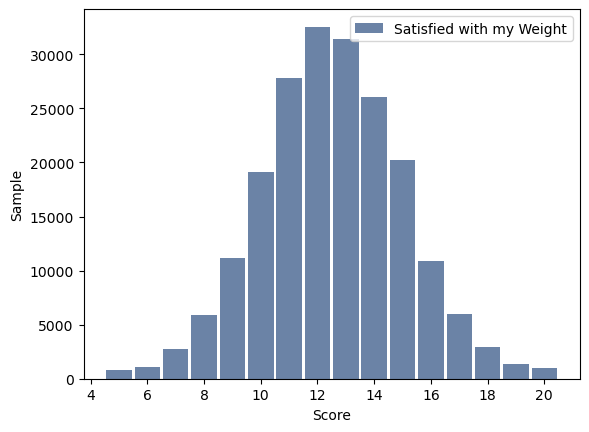

<Figure size 800x600 with 0 Axes>

In [3]:
# Histograms of Health

Summarize(data,"Health","Satisfied with my Weight:")
print("Skew: ", data["Health"].skew())
hist = thinkstats2.Hist(data.Health, label='Satisfied with my Weight')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Annual Household Income:
key	n	mean	mode	var	std	cv
All Yrs	201216	12.49	13.00	9.13	3.02	0.2419
2021	23964	12.71	12.00	7.68	2.77	0.2181
2022	48668	12.57	12.00	9.06	3.01	0.2395
2023	51409	12.46	12.00	9.36	3.06	0.2456
2024	51480	12.38	13.00	9.32	3.05	0.2466
Skew:  -0.12802835943871577


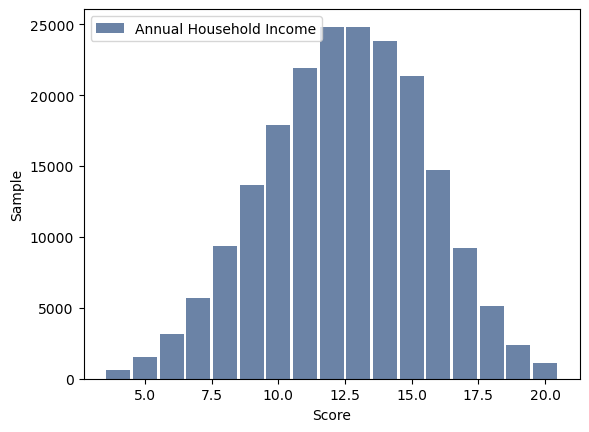

<Figure size 800x600 with 0 Axes>

In [4]:
# Histograms of Wealth

Summarize(data,"Wealth","Annual Household Income:")
print("Skew: ", data["Wealth"].skew())
hist = thinkstats2.Hist(data.Wealth, label='Annual Household Income')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Spending time with my family is my top priority
key	n	mean	mode	var	std	cv
All Yrs	201216	13.79	15.00	7.49	2.74	0.1984
2021	23964	13.85	15.00	6.53	2.56	0.1845
2022	48668	13.80	15.00	7.34	2.71	0.1962
2023	51409	13.77	15.00	7.74	2.78	0.2020
2024	51480	13.79	15.00	7.63	2.76	0.2004
Skew:  -0.2626352669821632


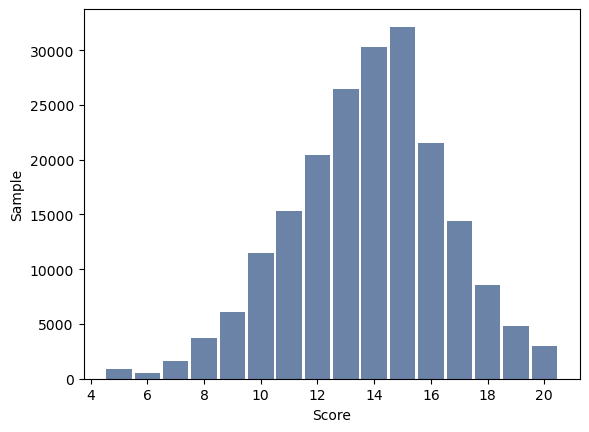

<Figure size 800x600 with 0 Axes>

In [18]:
# Histograms of Love

Summarize(data,"Love","Spending time with my family is my top priority")
print("Skew: ", data["Love"].skew())
hist = thinkstats2.Hist(data.Love, label='Spending time with my family is my top priority')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Faith: Hold to Religious Belief
key	n	mean	mode	var	std	cv
All Yrs	201216	12.28	5.00	21.78	4.67	0.3801
2021	23964	12.16	8.00	17.97	4.24	0.3485
2022	48668	12.25	5.00	22.78	4.77	0.3896
2023	51409	12.24	5.00	22.33	4.73	0.3862
2024	51480	12.33	5.00	22.00	4.69	0.3806
Skew:  -0.01872228544554493


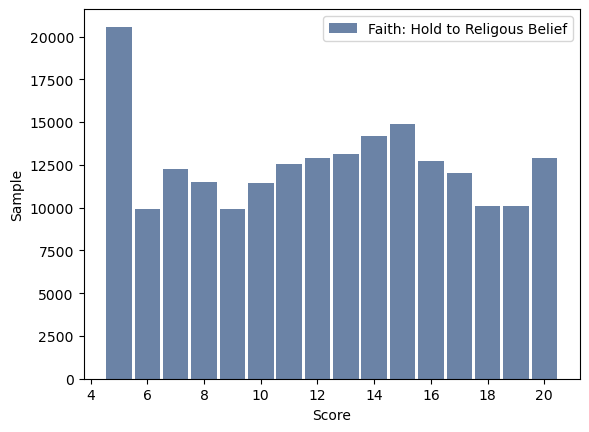

<Figure size 800x600 with 0 Axes>

In [6]:
# Histograms of Health

Summarize(data,"Faith","Faith: Hold to Religious Belief")
print("Skew: ", data["Faith"].skew())
hist = thinkstats2.Hist(data.Faith, label='Faith: Hold to Religous Belief')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Happy with my Standard of Living:
key	n	mean	mode	var	std	cv
All Yrs	201216	3.07	3.00	0.64	0.80	0.2609
2021	23964	3.13	3.00	0.56	0.75	0.2392
2022	48668	3.12	3.00	0.60	0.77	0.2478
2023	51409	3.06	3.00	0.66	0.81	0.2660
2024	51480	3.03	3.00	0.67	0.82	0.2704


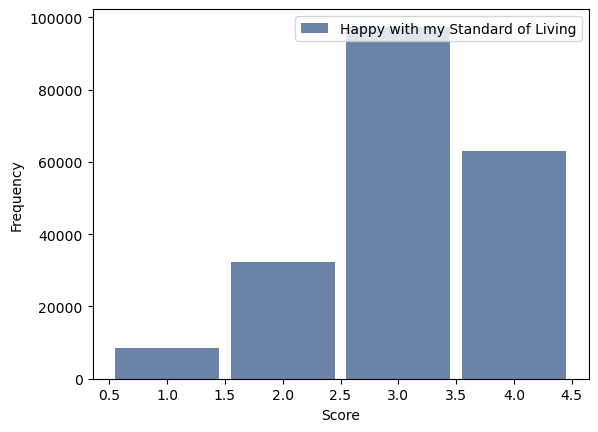

Skew:  -0.6242185413458968


<Figure size 800x600 with 0 Axes>

In [7]:
# Histograms of Happiness

Summarize(data,"Happy","Happy with my Standard of Living:")
hist = thinkstats2.Hist(data.Happy, label='Happy with my Standard of Living')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')
print("Skew: ", data["Happy"].skew())

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). {-}

Health+Wealth+Love+Faith Score:
key	n	mean	mode	var	std	cv
All Yrs	201216	51.08	50.00	68.18	8.26	0.1616
2021	23964	51.31	51.00	49.78	7.06	0.1375
2022	48668	51.13	51.00	68.10	8.25	0.1614
2023	51409	51.01	51.00	71.41	8.45	0.1657
2024	51480	50.96	50.00	70.99	8.43	0.1653
Skew: -0.06853466110133538
Kurtosis: 0.2463600818625875


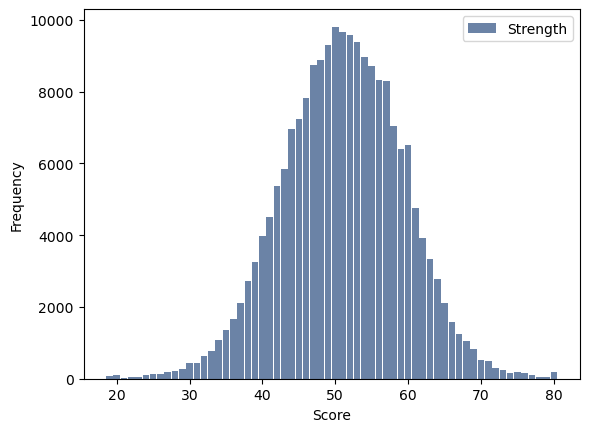

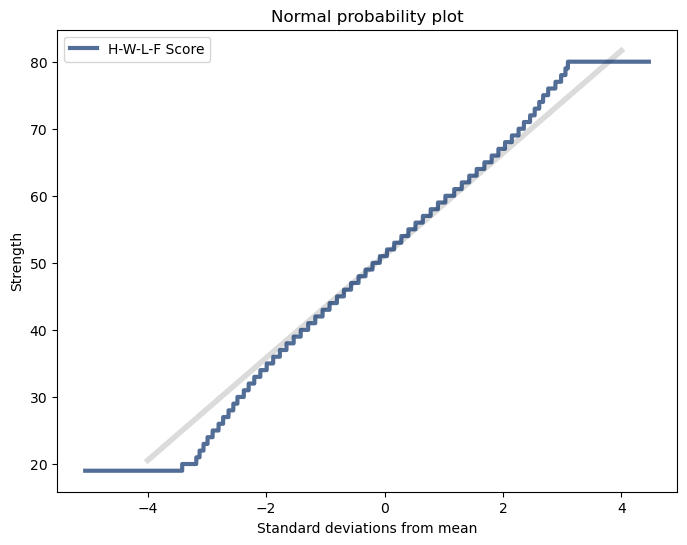

In [8]:
# Plot a histogram and analytical distribtion of the combined "Strength" score
# Note: I did these out of book order here and in the presentation for the purpose of introducing the strength score
# which is used in the next few slides.

Summarize(data,"Strength","Health+Wealth+Love+Faith Score:")
print("Skew:", data.Strength.skew())
print("Kurtosis:", data.Strength.kurtosis())
hist = thinkstats2.Hist(data.Strength, label='Strength')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

mean, var = thinkstats2.TrimmedMeanVar(data.Strength, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(data.Strength)
thinkplot.Plot(xs, ys, label="H-W-L-F Score")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Strength",
)

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

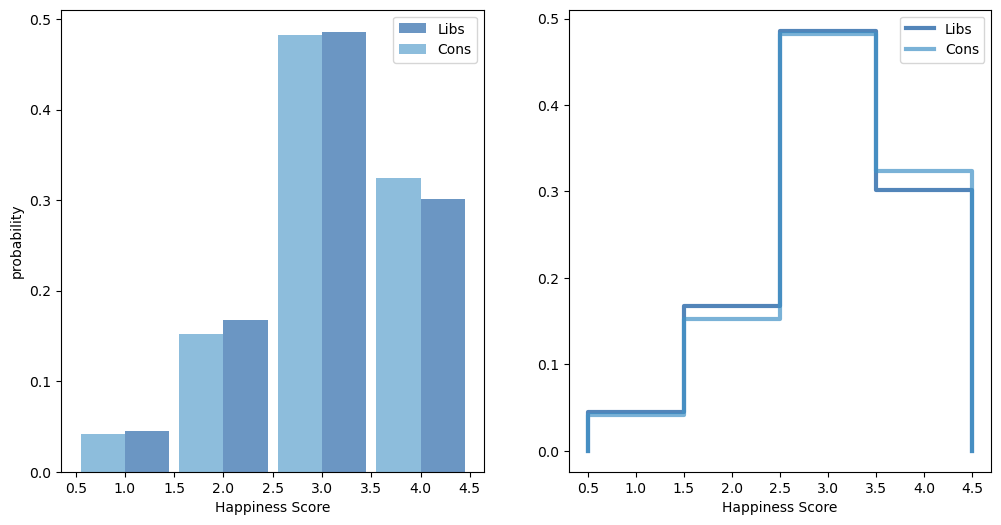

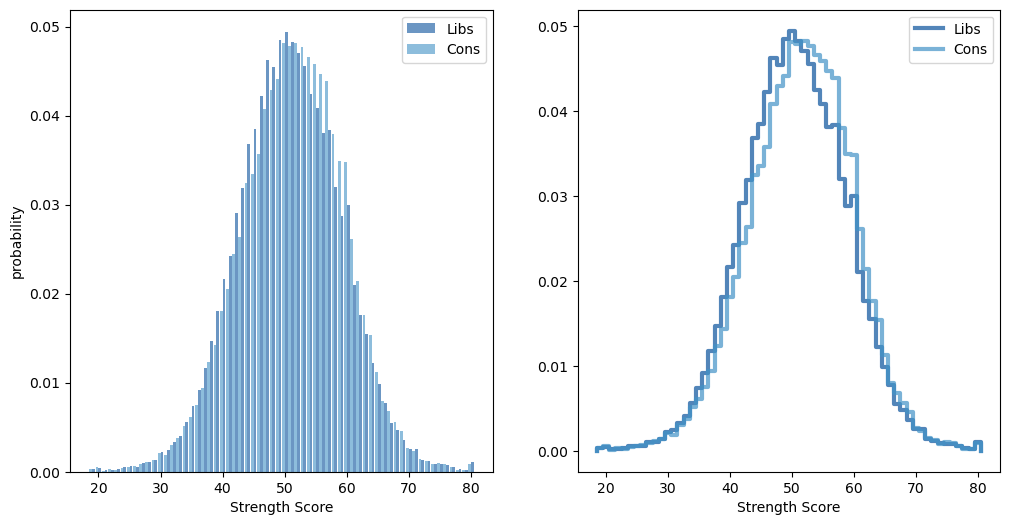

<Figure size 800x600 with 0 Axes>

In [9]:
# Compare Conservatives and Liberals in terms of Strength and Happiness

# Low Politics is Conservative, High Politics is Liberal
Liberal_Happy = thinkstats2.Pmf(data[data.Politics > 3].Happy, label="Libs")
Conserv_Happy = thinkstats2.Pmf(data[data.Politics < 3].Happy, label="Cons")
Liberal_Stren = thinkstats2.Pmf(data[data.Politics > 3].Strength, label="Libs")
Conserv_Stren = thinkstats2.Pmf(data[data.Politics < 3].Strength, label="Cons")

width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Liberal_Happy, align='left', width=width, label = "Libs")
thinkplot.Hist(Conserv_Happy, align='right', width=width, label = "Cons")
thinkplot.Config(xlabel='Happiness Score', ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Liberal_Happy, Conserv_Happy]) 
thinkplot.Show(xlabel='Happiness Score')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Liberal_Stren, align='left', width=width, label = "Libs")
thinkplot.Hist(Conserv_Stren, align='right', width=width, label = "Cons")
thinkplot.Config(xlabel='Strength Score', ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Liberal_Stren, Conserv_Stren]) 
thinkplot.Show(xlabel='Strength Score')

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

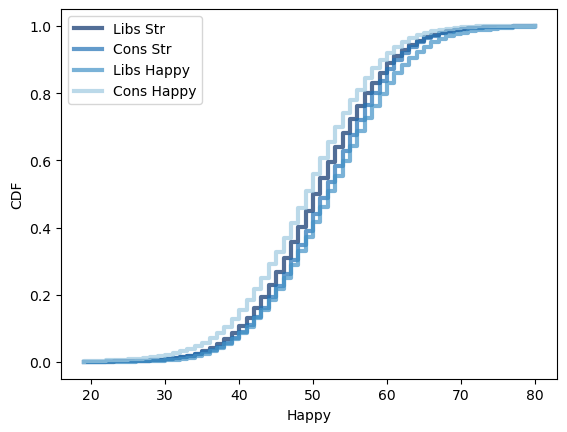

In [10]:
# Compare Conservatives and Liberals in terms of Strength and Happiness using a CDF chart

Liberal_cdf = thinkstats2.Cdf(data[data.Politics > 3 ].Strength, label="Libs Str")
Conserv_cdf = thinkstats2.Cdf(data[data.Politics < 3 ].Strength, label="Cons Str")
thinkplot.Cdfs([Liberal_cdf, Conserv_cdf])
thinkplot.Config(xlabel='Strength', ylabel='CDF')
Liberal_cdf = thinkstats2.Cdf(data[data.Happy > 3 ].Strength, label="Libs Happy")
Conserv_cdf = thinkstats2.Cdf(data[data.Happy < 3 ].Strength, label="Cons Happy")
thinkplot.Cdfs([Liberal_cdf, Conserv_cdf])
thinkplot.Config(xlabel='Happy', ylabel='CDF')

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7). {-}

Correlation: 0.1505
Spearmans Corr: 0.1282


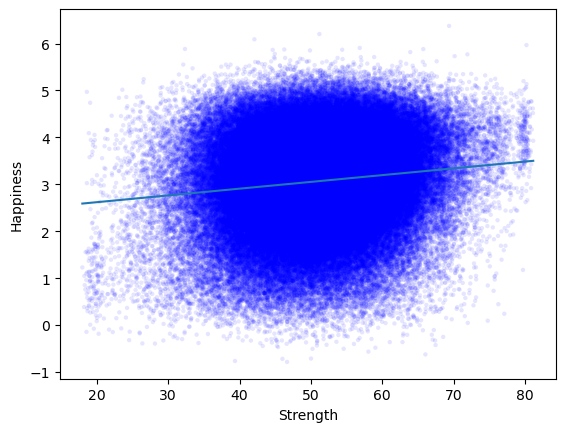

In [11]:
# Create a point cloud and correlation line of strenth scores vs. happiness scores.

from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
    
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print(f"Correlation: {Corr(data.Strength,data.Happy):.4f}\nSpearmans Corr: {SpearmanCorr(data.Strength,data.Happy):.4f}")
xs = [-4, 4]
jstrength, jhappy = Jitter(data.Strength), Jitter(data.Happy)
bins = np.arange(0, 20, 1)
indices = np.digitize(jstrength, bins)
groups = data.groupby(indices)
mean_strengths = [jstrength.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(jhappy) for i, group in groups]
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_strengths, weight_percentiles, label=label)

thinkplot.Scatter(jstrength, jhappy, alpha=0.1, s=10)
plt.plot(np.unique(jstrength), np.poly1d(np.polyfit(jstrength, jhappy, 1))(np.unique(jstrength)))
thinkplot.Config(xlabel='Strength',
                 ylabel='Happiness',
                 legend=False)

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9. {-}

0.0


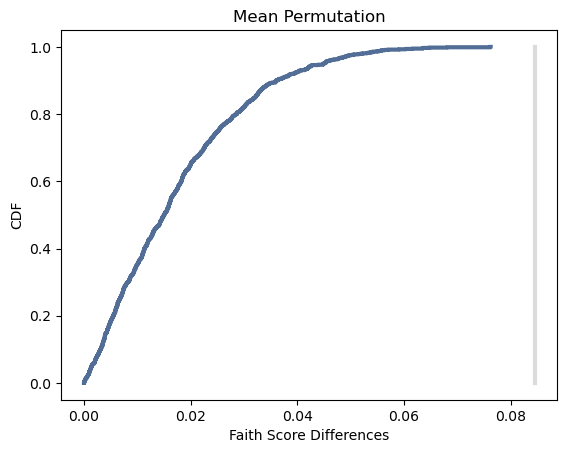

<Figure size 800x600 with 0 Axes>

In [12]:
# Take a closer look at that Faith measure, which appears to show a drop over the last four years.

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Later = data.Faith[data.Wave >=5]
Early = data.Faith[data.Wave < 5]
hdata = Early, Later
ht = DiffMeansPermute(hdata)
pvalue = ht.PValue()

print(pvalue)
ht.PlotCdf()
thinkplot.Show(title="Mean Permutation", xlabel='Faith Score Differences', ylabel='CDF')

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). {-}

               Coef
Intercept  2.307176
Health     0.011130
Wealth     0.033594
Love       0.003166
Faith      0.012808
                            OLS Regression Results                            
Dep. Variable:                  Happy   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:22:50   Log-Likelihood:            -2.3776e+05
No. Observations:              201216   AIC:                         4.755e+05
Df Residuals:                  201211   BIC:                         4.756e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

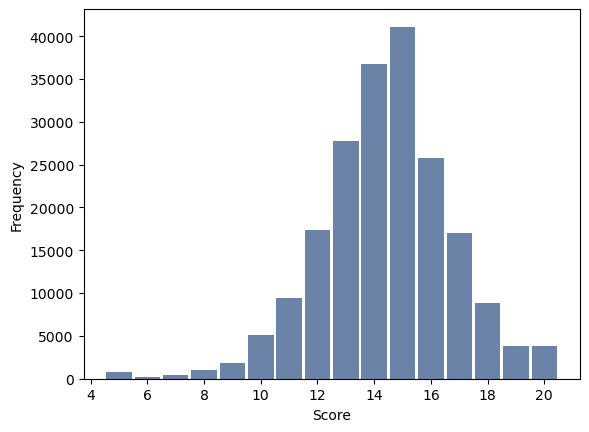

<Figure size 800x600 with 0 Axes>

In [17]:
# Preform a regression analysis on each of the components of strength to happiness, then use regression to get the individual 
# questions that are most correlated with happiness.  Finally, show the histogram of happiness in terms of the top five questions.

formula = 'Happy ~ Health + Wealth + Love + Faith'
model = smf.ols(formula, data=data)
results = model.fit()
resframe = pd.DataFrame(results.params)
resframe.columns = ["Coef"]
print(resframe)
print(results.summary())

allq = pd.DataFrame(first["X1"])
allq["Happy"] = first.Happy
formula = 'Happy ~ X1'
for i in range(2,126):
    allq["X"+str(i)] = first["X"+str(i)]
    formula += (" + X" + str(i))

model = smf.ols(formula, data=allq)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print(final.nlargest(5,"Coef"))
# print(results.summary())

data["HappyC"] = 0
lst = final.nlargest(5,"Coef").index.tolist()
print(lst[0:5])
for cur in lst[0:5]:
    data["HappyC"] += first[cur]
Summarize(data,"HappyC","Happy Attitude Score")
print("Skew:",data["HappyC"].skew())
print("Kurtosis:",data["HappyC"].kurtosis())
hist = thinkstats2.Hist(data.HappyC, label='Happiness')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')
